In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import numpy as np

In [2]:
white_wine_data = pd.read_csv("C:\\Users\\awwal\\Desktop\\wine+quality\\winequality-white.csv")


In [3]:
white_wine_data.head()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
def classify_quality(Quality):
    if Quality <= 4:
        return "Low"
    elif Quality <= 6:
        return "Medium"
    else:
        return "High"

In [5]:
white_wine_data["Quality_scale"] = white_wine_data["Quality"].apply(classify_quality)


In [6]:
white_wine_data

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality,Quality_scale
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,Medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,Medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,Medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,Medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,Medium
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,Medium
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,Medium
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,High


In [7]:
scale_distribution = white_wine_data["Quality_scale"].value_counts()
scale_distribution

Quality_scale
Medium    3655
High      1060
Low        183
Name: count, dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\awwal\AppData\Local\Temp\ipykernel_16948\1289509661.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Quality", data=white_wine_data, palette="viridis")


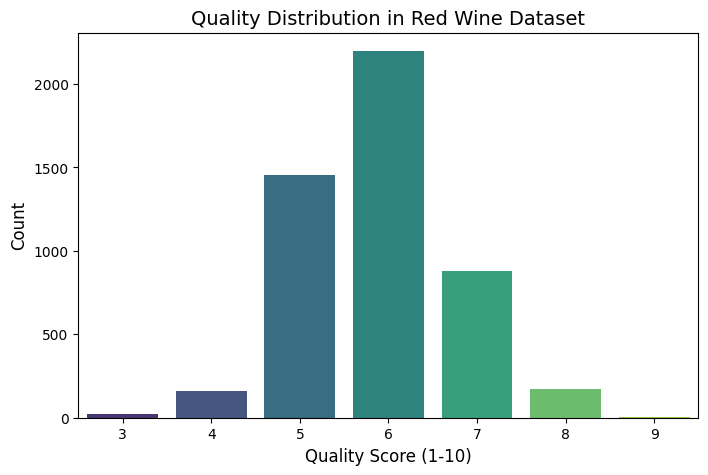

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Quality", data=white_wine_data, palette="viridis")
plt.title("Quality Distribution in Red Wine Dataset", fontsize=14)
plt.xlabel("Quality Score (1-10)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [12]:
# Filter numeric columns only
numeric_data = white_wine_data.select_dtypes(include=['float64', 'int64'])

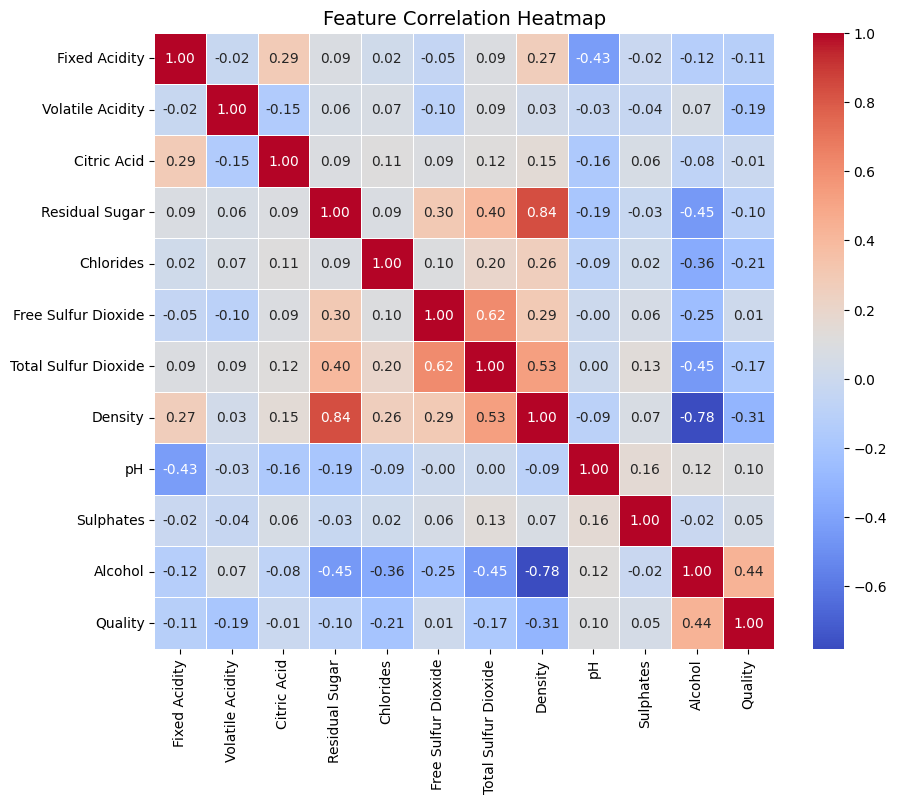

In [13]:
# Correlation Heatmap
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()


In [14]:
# Handle outliers
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

In [19]:
key_features = ['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Alcohol']
for feature in key_features:
    white_wine_data = remove_outliers(white_wine_data, feature)

In [20]:
white_wine_data

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality,Quality_scale
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,Medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,Medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,Medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,Medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,Medium
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,Medium
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,Medium
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,High


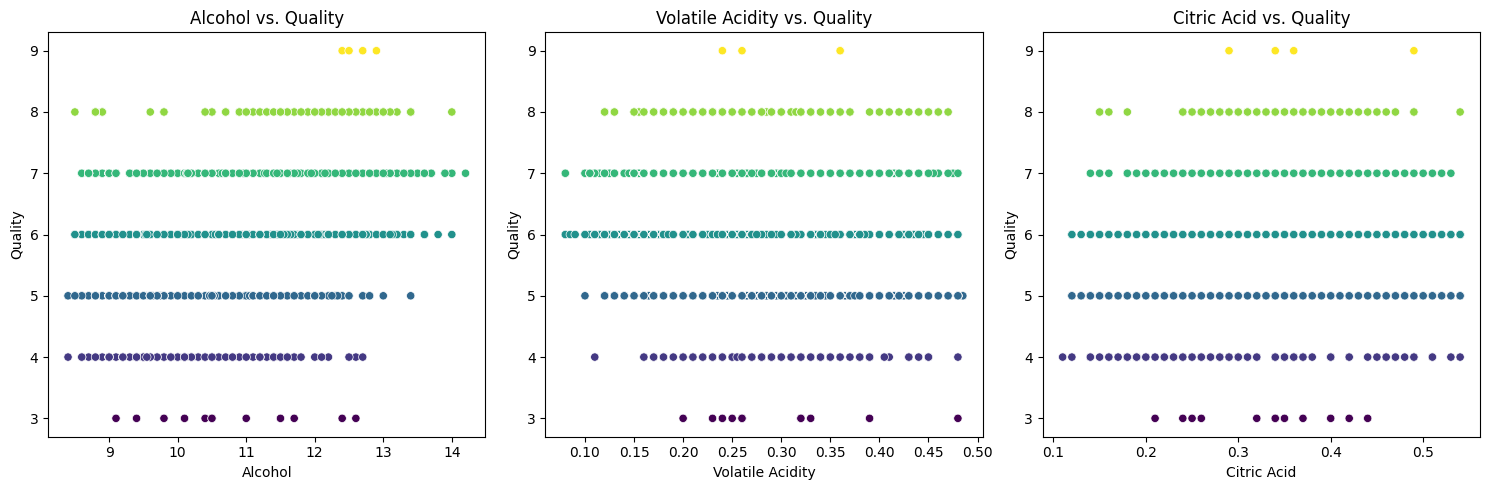

In [21]:
key_features = ["Alcohol", "Volatile Acidity", "Citric Acid"]
plt.figure(figsize=(15, 5))
for i, feature in enumerate(key_features, start=1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=feature, y="Quality", data=white_wine_data, hue="Quality", palette="viridis", legend=False)
    plt.title(f"{feature.title()} vs. Quality", fontsize=12)
    plt.xlabel(feature.title(), fontsize=10)
    plt.ylabel("Quality", fontsize=10)

plt.tight_layout()
plt.show()

Modeling

In [22]:
features = white_wine_data.drop(columns=['Quality', 'Quality_scale'])
target = white_wine_data['Quality_scale']

In [23]:
# Normalize features
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(normalized_features, target, test_size=0.3, random_state=42)


In [25]:
random_forest_clf = RandomForestClassifier(random_state=42)
random_forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
print(target.isna().sum())  # Should be 0

0


In [28]:
white_wine_data

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality,Quality_scale
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,Medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,Medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,Medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,Medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,Medium
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,Medium
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,Medium
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,High


In [29]:
y_pred = random_forest_clf.predict(X_test)

In [30]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

        High       0.77      0.66      0.71       282
         Low       1.00      0.12      0.22        33
      Medium       0.88      0.94      0.91       987

    accuracy                           0.86      1302
   macro avg       0.89      0.58      0.61      1302
weighted avg       0.86      0.86      0.85      1302

Accuracy: 0.8625192012288786


In [31]:
X= features

In [32]:
check_x= X.values
check_y= target.values

In [33]:
target

0       Medium
1       Medium
2       Medium
3       Medium
4       Medium
         ...  
4893    Medium
4894    Medium
4895    Medium
4896      High
4897    Medium
Name: Quality_scale, Length: 4338, dtype: object

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
import numpy as np

In [35]:
# Define models as instances
models = []
models.append(("lr", LogisticRegression(solver="liblinear", multi_class="ovr")))
models.append(("lda", LinearDiscriminantAnalysis()))
models.append(("knn", KNeighborsClassifier()))
models.append(("dtc", DecisionTreeClassifier()))
models.append(("gnb", GaussianNB()))
models.append(("rfr", RandomForestClassifier()))
models.append(("svc",SVC()))

results = []
names = []

# Evaluate each model
for name, model in models:
    k_fold = StratifiedKFold(n_splits=10)
    cv_result = cross_val_score(model, check_x, check_y, cv=k_fold, scoring="accuracy")
    results.append(cv_result)
    names.append(name)
    print('%s: %f (%f)' % (name, np.mean(cv_result), np.std(cv_result)))

# Optional: Aggregate results
print("All results:", results)

C:\Users\awwal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\awwal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\awwal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was de

lr: 0.756794 (0.023286)
lda: 0.757479 (0.032061)
knn: 0.692935 (0.027260)
dtc: 0.674264 (0.034453)
gnb: 0.696141 (0.055275)
rfr: 0.772011 (0.029629)
svc: 0.741355 (0.000892)
All results: [array([0.77419355, 0.74423963, 0.74423963, 0.74193548, 0.76036866,
       0.76497696, 0.73963134, 0.81336406, 0.75981524, 0.72517321]), array([0.78801843, 0.74423963, 0.76497696, 0.75115207, 0.78571429,
       0.76497696, 0.70737327, 0.81105991, 0.75288684, 0.70438799]), array([0.72119816, 0.7281106 , 0.68202765, 0.70737327, 0.71198157,
       0.71658986, 0.66129032, 0.66129032, 0.69284065, 0.64665127]), array([0.67050691, 0.65898618, 0.65437788, 0.6843318 , 0.74193548,
       0.68663594, 0.66820276, 0.67281106, 0.70438799, 0.60046189]), array([0.79032258, 0.74423963, 0.72580645, 0.74193548, 0.71428571,
       0.67741935, 0.62442396, 0.68894009, 0.64896074, 0.60508083]), array([0.78571429, 0.76267281, 0.75115207, 0.74654378, 0.80875576,
       0.81336406, 0.74884793, 0.7764977 , 0.80600462, 0.72055427